# Exploratory Data Analysis

Roles to Explore:

In [ ]:
# import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# cleanng data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# cleaning the 'job_skills' into a list datatype
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\ezequ\anaconda3\envs\luke_b\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Filter for Argentinian Data Analyst Roles

In [2]:
df_DA_ARG = df[(df['job_country'] == 'Argentina') & (df['job_title_short'] == 'Data Analyst')]

In [3]:
df_DA_ARG

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2023,Data Analyst,Data Analyst,Anywhere,via LinkedIn,Full-time,True,Argentina,2023-03-03 13:38:00,False,False,Argentina,None,NaN,NaN,Job Duck,"[sql, python, javascript, excel, sheets, power...","{'analyst_tools': ['excel', 'sheets', 'power b..."
3459,Data Analyst,Data Analyst (USD & Remote),Anywhere,via LinkedIn,Full-time,True,Argentina,2023-09-21 13:37:40,False,False,Argentina,None,NaN,NaN,Vintti,"[sql, excel, sheets, flow]","{'analyst_tools': ['excel', 'sheets'], 'other'..."
4407,Data Analyst,Marketing Data Analyst,Argentina,"via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-08-03 13:11:37,True,False,Argentina,None,NaN,NaN,IT Scout,None,None
5187,Data Analyst,Data Analyst,Argentina,via LinkedIn,Full-time,False,Argentina,2023-04-28 13:18:43,True,False,Argentina,None,NaN,NaN,Tata Consultancy Services,"[sql, nosql, neo4j, gcp, azure, bigquery]","{'cloud': ['gcp', 'azure', 'bigquery'], 'datab..."
6663,Data Analyst,Data Analyst,"Buenos Aires, Argentina",via BeBee,Full-time,False,Argentina,2023-12-22 13:14:46,False,False,Argentina,None,NaN,NaN,Universidad de Palermo,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785193,Data Analyst,Data Analyst,"Buenos Aires, Argentina","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-10-14 07:07:44,True,False,Argentina,None,NaN,NaN,Emprego,"[sql, r]","{'programming': ['sql', 'r']}"
785306,Data Analyst,Data Analyst Tfe,Argentina,"via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-10-14 07:07:36,True,False,Argentina,None,NaN,NaN,Emprego,"[sql, python, r, vba, azure, power bi, git]","{'analyst_tools': ['power bi'], 'cloud': ['azu..."
785319,Data Analyst,Data Analyst,"Buenos Aires, Argentina","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-10-14 07:07:42,True,False,Argentina,None,NaN,NaN,Emprego,"[sql, python, r, aws, azure, hadoop, git]","{'cloud': ['aws', 'azure'], 'libraries': ['had..."
785638,Data Analyst,Data Analyst,"Buenos Aires, Argentina","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-10-27 06:47:13,False,False,Argentina,None,NaN,NaN,Emprego,"[python, r, sql, looker, tableau]","{'analyst_tools': ['looker', 'tableau'], 'prog..."


In [ ]:
df_DA_ARG['job_location'].value_counts().head(10).to_frame()

# value_counts returns the ammounts of each inside the dataframe
# head(10) shows the first 10 results
# to_frame converts it into a dataframe-like visualization

,count
job_location,
"Buenos Aires, Argentina",630
Argentina,398
Anywhere,88
"Córdoba, Córdoba Province, Argentina",30
"Córdoba, Cordoba, Argentina",17
"Olivos, Buenos Aires Province, Argentina",11
"Thames, Buenos Aires Province, Argentina",11
"Rosario, Santa Fe Province, Argentina",11
"Federal, Entre Rios, Argentina",8


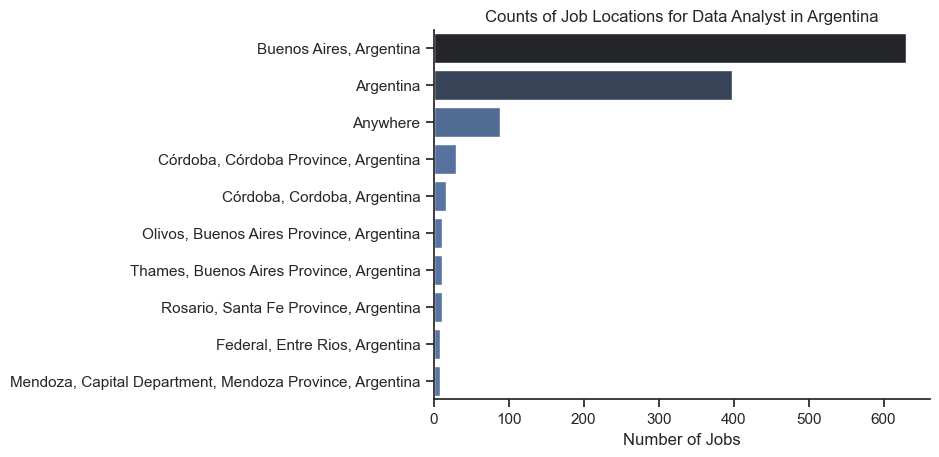

In [16]:
# we import seaborn to plot with it
import seaborn as sns

# we save it to a variable
df_plot = df_DA_ARG['job_location'].value_counts().head(10).to_frame()

# we set the theme with seaborn
sns.set_theme(style='ticks')

# we set the barplot with seaborn, specifying the data, the x and y axes, the hue and the palette. 
# we also removed the legend
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)

# we remove the line that goes all around the plot
sns.despine()

# we set the plot title and label
plt.title('Counts of Job Locations for Data Analyst in Argentina')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

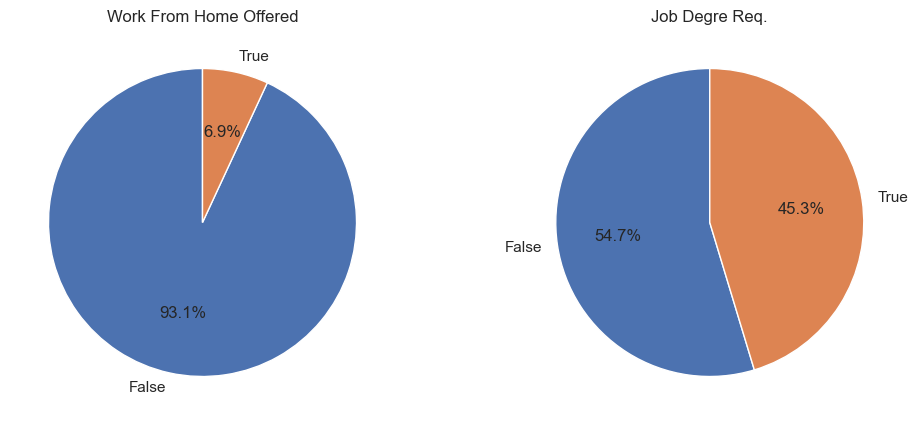

In [23]:
dict_column = {
    'job_work_from_home': 'Work From Home Offered',
    'job_no_degree_mention': 'Job Degre Req.',
}

fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_ARG[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

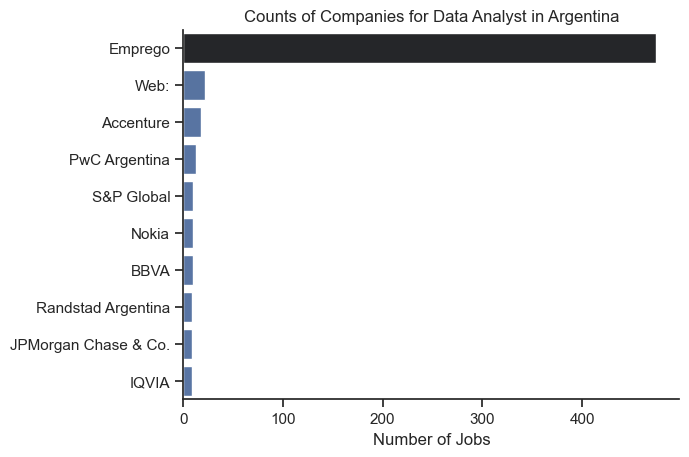

In [24]:
df_plot = df_DA_ARG['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title('Counts of Companies for Data Analyst in Argentina')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()